C:\Users\rosar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


🔍 Competitive Market Clustering Result:
      Company  Price  Features  UserRating  Cluster
0   AlphaCorp    100        25         4.3        0
1    BetaTech    150        30         4.7        1
2   GammaSoft     90        20         4.0        0
3     DeltaAI    200        40         4.9        1
4  EpsilonSys     80        18         3.8        0


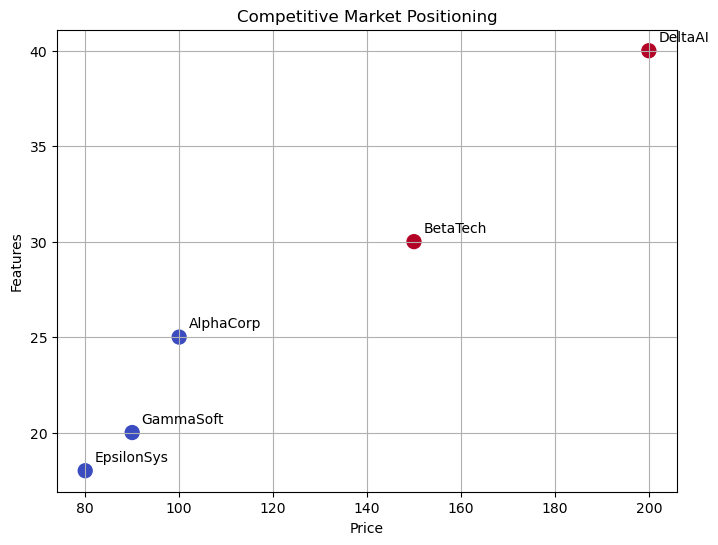

00:47:32 - cmdstanpy - INFO - Chain [1] start processing
00:47:33 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\rosar\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


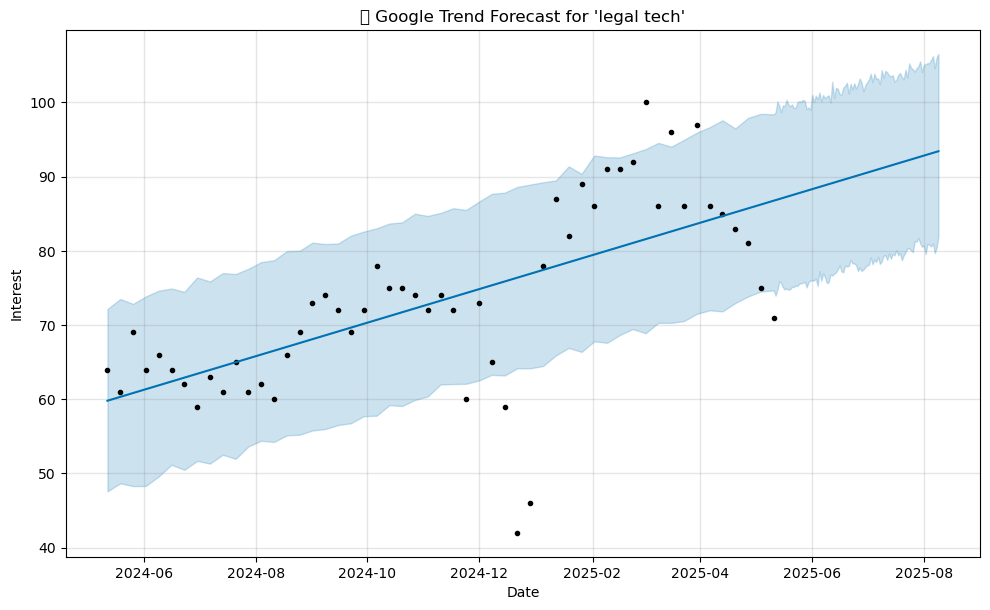

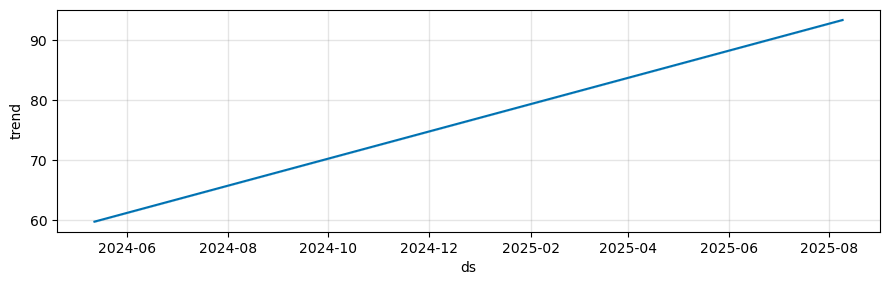

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from pytrends.request import TrendReq
from prophet import Prophet
import matplotlib.pyplot as plt

# -------------------------------
# PART 1: Competitive Market Positioning
# -------------------------------

# Simulated competitor dataset
competitor_data = {
    'Company': ['AlphaCorp', 'BetaTech', 'GammaSoft', 'DeltaAI', 'EpsilonSys'],
    'Price': [100, 150, 90, 200, 80],          # in USD
    'Features': [25, 30, 20, 40, 18],          # number of features
    'UserRating': [4.3, 4.7, 4.0, 4.9, 3.8]    # out of 5
}

df = pd.DataFrame(competitor_data)
X = df[['Price', 'Features', 'UserRating']]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Display results
print("🔍 Competitive Market Clustering Result:")
print(df)

# Plot market positioning
plt.figure(figsize=(8, 6))
plt.scatter(df['Price'], df['Features'], c=df['Cluster'], cmap='coolwarm', s=100)
for i, txt in enumerate(df['Company']):
    plt.annotate(txt, (df['Price'][i]+2, df['Features'][i]+0.5))
plt.title("Competitive Market Positioning")
plt.xlabel("Price")
plt.ylabel("Features")
plt.grid(True)
plt.show()

# -------------------------------
# PART 2: Trend Forecasting (Google Trends + Prophet)
# -------------------------------

# Set up Google Trends
pytrends = TrendReq(hl='en-US', tz=360)
keyword = "legal tech"  # you can change this to any keyword
pytrends.build_payload([keyword], timeframe='today 12-m')

# Fetch interest over time
trend_data = pytrends.interest_over_time().reset_index()
trend_data = trend_data[['date', keyword]]
trend_data.columns = ['ds', 'y']  # required format for Prophet

# Forecast with Prophet
model = Prophet()
model.fit(trend_data)

# Predict for next 3 months (90 days)
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title(f"📈 Google Trend Forecast for '{keyword}'")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.show()

# Optional: Show trend components
model.plot_components(forecast)
plt.show()

!pip install pandas matplotlib scikit-learn prophet pytrends

In [4]:
pip install pandas matplotlib scikit-learn prophet pytrends


   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/13.3 MB 2.0 MB/s eta 0:00:07
    --------------------------------------- 0.2/13.3 MB 2.0 MB/s eta 0:00:07
    --------------------------------------- 0.3/13.3 MB 2.0 MB/s eta 0:00:07
   - -------------------------------------- 0.3/13.3 MB 1.8 MB/s eta 0:00:08
   - -------------------------------------- 0.4/13.3 MB 1.8 MB/s eta 0:00:08
   - -------------------------------------- 0.5/13.3 MB 1.8 MB/s eta 0:00:08
   - -------------------------------------- 0.6/13.3 MB 1.8 MB/s eta 0:00:08
   -- ------------------------------------- 0.7/13.3 MB 1.9 MB/s eta 0:00:07
   -- ------------------------------------- 0.8/13.3 MB 2.0 MB/s eta 0:00:07
   -- ------------------------------------- 1.0/13.3 MB 2.1 MB/s eta 0:00:06
   --- ------------------------------------ 1.1/13.3 MB 2.1 MB/s eta 0:00:06
   --- ------------------------------------ 1.2/13.3 MB 2.2 MB/s eta 0:00:06
   ---